In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch_model import model 

In [2]:
batch_size = 1
num_classes = 8
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
class TestDataset(Dataset):
    def __init__(self):
        self.x = torch.from_numpy(np.load('Training_Data/test_x.npy').astype(np.float32))
        self.y = torch.from_numpy(np.load('Training_Data/test_y.npy').reshape(-1,1).astype(np.float32))
        self.n_samples = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples

testDataset = TestDataset()
test_loader = DataLoader(dataset=testDataset,batch_size=batch_size,shuffle=True)

In [4]:
print(f"Number of samples: {len(test_loader)}")

Number of samples: 3998


In [5]:
model = model.to(device)
model.load_state_dict(torch.load('model.pt'))
print(model)
# Set model to evaluation model
model.eval() 

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (1): ResBlock(
    (conv1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (conv2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (2): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, mome

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (1): ResBlock(
    (conv1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (conv2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (2): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, mome

In [6]:
# Dictionary genres
dict_genres = {
    "Hip-Hop": 0,
    "International": 1,
    "Electronic": 2,
    "Folk" : 3,
    "Experimental": 4,
    "Rock": 5,
    "Pop": 6,
    "Instrumental": 7  
}

In [7]:
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs/255
        inputs = (inputs[:,None,:,:]).to(device)
        labels = F.one_hot(targets.type(torch.LongTensor),num_classes).reshape(-1,num_classes).to(device)
        out = model(inputs)
        _, predicted = torch.max(out.data, 1)
        y_true.append((torch.max(labels,1)[1]).tolist())
        y_pred.append(predicted.tolist())

In [8]:
y_true[:10]

[[4], [1], [0], [3], [2], [2], [0], [3], [5], [3]]

In [9]:
y_pred[:10]

[[4], [6], [0], [3], [2], [2], [0], [3], [5], [3]]

In [10]:
from sklearn.metrics import classification_report
target_names = dict_genres.keys()
print(classification_report(y_true, y_pred, target_names=target_names))

               precision    recall  f1-score   support

      Hip-Hop       0.94      0.94      0.94       540
International       0.91      0.92      0.92       455
   Electronic       0.91      0.91      0.91       462
         Folk       0.89      0.92      0.90       524
 Experimental       0.92      0.87      0.89       531
         Rock       0.90      0.91      0.90       517
          Pop       0.87      0.81      0.84       492
 Instrumental       0.85      0.91      0.88       477

    micro avg       0.90      0.90      0.90      3998
    macro avg       0.90      0.90      0.90      3998
 weighted avg       0.90      0.90      0.90      3998



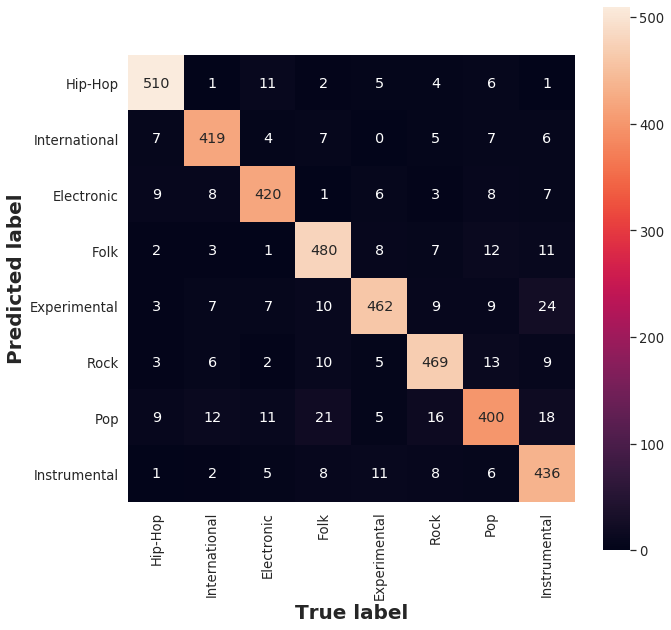

In [11]:
# Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.2)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=dict_genres.keys(),
            yticklabels=dict_genres.keys())
plt.xlabel('True label', fontsize=20, fontweight='bold')
plt.ylabel('Predicted label', fontsize=20, fontweight='bold');

In [12]:
from sklearn.metrics import accuracy_score
print("Accuracy score: {:.4f} % ".format(accuracy_score(y_true, y_pred)*100))

Accuracy score: 89.9450 % 
